<a href="https://colab.research.google.com/github/vivianlinnn/DS41_IDXExchange/blob/main/src/04_BaselineModel_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#START: VIVIAN LIN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

## Load the Train/Test Datasets

Test set: the last month of data provided: December 2025

Training set: a minimum of 6 months of data prior to the test month (June 2025 to November 2025)

In [ ]:
test = pd.read_csv('/content/test_cleaned.csv')
train = pd.read_csv('/content/train_cleaned.csv')


## Plotting Distribution of Potential Dependent Variables

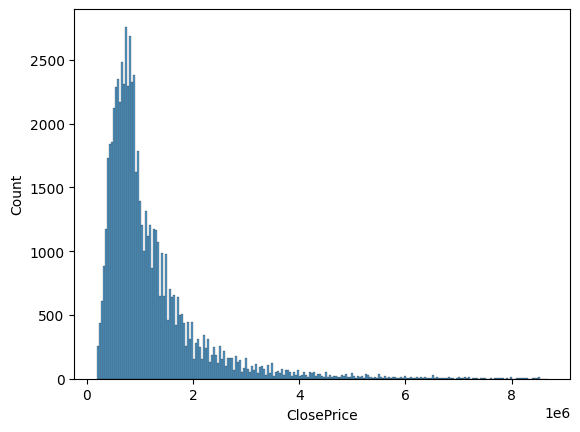

In [ ]:
sns.histplot(x='ClosePrice', data=train);

The distribution of ClosePrice is right-skewed. What if we log the values of ClosePrice?

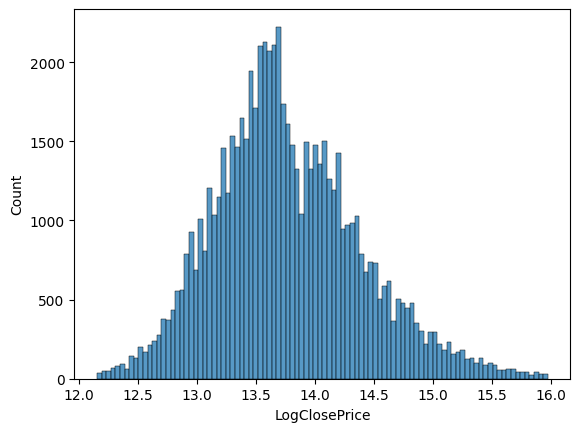

In [ ]:
# Create a column 'LogClosePrice' which is basically the natural log of the ClosePrice column
train['LogClosePrice'] = np.log(train['ClosePrice'])
sns.histplot(x='LogClosePrice', data=train); # Plots the distribution of the log of ClosePrice

The distribution of the log of ClosedPrice is relatively more normal.

`ClosePrice` or `LogClosePrice`: What is being predicted

All other variables: Predictors/Features

In [ ]:
# Getting all the features
features = list(train.columns)
features.remove('ClosePrice') # removing what is to be predicted
features.remove('LogClosePrice')

In [ ]:
# Dictionary of whether each feature is categorical or continuous

feature_types = {
    'ViewYN': 'categorical',
    'PoolPrivateYN': 'categorical',
    'CloseDate': 'categorical',  # treat as date or extract year/month
    'ClosePrice': 'continuous',
    'Latitude': 'continuous',
    'Longitude': 'continuous',
    'LivingArea': 'continuous',
    'MLSAreaMajor': 'categorical',
    'AttachedGarageYN': 'categorical',
    'ParkingTotal': 'continuous',  # small integers, could also be ordinal
    'LotSizeAcres': 'continuous',
    'YearBuilt': 'continuous',  # technically discrete, treat as numeric
    'BathroomsTotalInteger': 'continuous',  # small integers, can be ordinal
    'City': 'categorical',
    'BedroomsTotal': 'continuous',  # small integers, can be ordinal
    'FireplaceYN': 'categorical',
    'Stories': 'categorical',  # ordinal / few levels
    'Levels': 'categorical',   # ordinal / few levels
    'LotSizeArea': 'continuous',
    'NewConstructionYN': 'categorical',
    'GarageSpaces': 'continuous',  # small integers, can be ordinal
    'HighSchoolDistrict': 'categorical',
    'PostalCode': 'categorical',
    'AssociationFee': 'continuous',
    'LotSizeSquareFeet': 'continuous',
    'LogClosePrice': 'continuous'
}


## Running OLS models from statsmodel

- Determines dependent variable: ClosePrice or LogClosePrice
- Determines which feature we should include in the final linear regression baseline model through $R^2$ values on the training set

### Feature + Dependent Variable

In [ ]:
# TAKES ~ 2 MINUTES TO RUN!!
# Finding the feature in the training set with the highest R^2 value
# What is predicted: ClosePrice

most_correlated_feature = None
highest_R2 = 0

for col in features:
    # Wrap categorical features in C() for statsmodels
    if feature_types[col] == 'categorical':
        formula = f'ClosePrice ~ C({col})'
    else:
        formula = f'ClosePrice ~ {col}'

    model = smf.ols(formula, data=train).fit()
    print(f'{col}: {model.rsquared:.4f}')

    if model.rsquared > highest_R2:
        highest_R2 = model.rsquared
        most_correlated_feature = col

print(f'\nMost correlated feature with ClosePrice: {most_correlated_feature}')
print(f'Highest R^2 value: {highest_R2:.4f}')


ViewYN: 0.0033
PoolPrivateYN: 0.0252
CloseDate: 0.0034
Latitude: 0.0000
Longitude: 0.0199
LivingArea: 0.3636
MLSAreaMajor: 0.4090
AttachedGarageYN: 0.0001
ParkingTotal: 0.0006
LotSizeAcres: 0.0001
YearBuilt: 0.0003
BathroomsTotalInteger: 0.3098
City: 0.5657
BedroomsTotal: 0.1210
FireplaceYN: 0.0457
Stories: 0.0372
Levels: 0.0610
LotSizeArea: 0.0011
NewConstructionYN: 0.0009
GarageSpaces: 0.0022
HighSchoolDistrict: 0.2239
PostalCode: 0.6445
AssociationFee: 0.0266
LotSizeSquareFeet: 0.0000

Most correlated feature with ClosePrice: PostalCode
Highest R^2 value: 0.6445


In [ ]:
# TAKES ~ 2 MINUTES TO RUN!!
# Finding the feature in the training set with the highest R^2 value
# What is predicted: LogClosePrice

# feature_types = { ... }  # your dictionary from earlier

most_correlated_feature_log = None
highest_R2_log = 0

for col in features:
    # Wrap categorical features in C() for statsmodels
    if feature_types[col] == 'categorical':
        formula = f'LogClosePrice ~ C({col})'
    else:
        formula = f'LogClosePrice ~ {col}'

    model = smf.ols(formula, data=train).fit()
    print(f'{col}: {model.rsquared:.4f}')

    if model.rsquared > highest_R2_log:
        highest_R2_log = model.rsquared
        most_correlated_feature_log = col

print(f'\nMost correlated feature with LogClosePrice: {most_correlated_feature_log}')
print(f'Highest R^2 value: {highest_R2_log:.4f}')


ViewYN: 0.0011
PoolPrivateYN: 0.0296
CloseDate: 0.0043
Latitude: 0.0016
Longitude: 0.0272
LivingArea: 0.3260
MLSAreaMajor: 0.4690
AttachedGarageYN: 0.0001
ParkingTotal: 0.0008
LotSizeAcres: 0.0000
YearBuilt: 0.0036
BathroomsTotalInteger: 0.2849
City: 0.6917
BedroomsTotal: 0.1470
FireplaceYN: 0.0672
Stories: 0.0517
Levels: 0.0757
LotSizeArea: 0.0007
NewConstructionYN: 0.0029
GarageSpaces: 0.0031
HighSchoolDistrict: 0.3253
PostalCode: 0.7621
AssociationFee: 0.0179
LotSizeSquareFeet: 0.0000

Most correlated feature with LogClosePrice: PostalCode
Highest R^2 value: 0.7621


In [ ]:
# Evaluates to see whether ClosePrice or LogClosePrice should be the dependent variable and what is the best feature
best_feat_results = pd.DataFrame({'DV': ['ClosePrice', 'LogClosePrice'],
                                   'Most Correlated Feature': [most_correlated_feature, most_correlated_feature_log],
                                   'R^2 Value':[highest_R2, highest_R2_log]})
best_feat = best_feat_results[best_feat_results['R^2 Value'] == best_feat_results['R^2 Value'].max()]['Most Correlated Feature'].iloc[0]
dep_var = best_feat_results[best_feat_results['R^2 Value'] == best_feat_results['R^2 Value'].max()]['DV'].iloc[0]

# features.remove(best_feat)

print(f'First Feature: {best_feat}\nDependent Variable: {dep_var}')

First Feature: PostalCode
Dependent Variable: LogClosePrice


Dependent variable of LogClosedPrice and first feature of PostalCode gives us the highest $R^2$ value of 0.7620903749132477 on the training set.


## Used Sklearn to Create Linear Regression Baseline Model

Linear Regression Baseline takes in the feature that is has the **highest** $R^2$ value when `LogClosePrice` is the dependent variable.

In [ ]:
# Just replace best_feat with 'PostalCode', so that you don't need to run everything again!!
X = pd.get_dummies(train[[best_feat]], drop_first=True)
y = train['LogClosePrice']
baseline_model = LinearRegression().fit(X, y)

baseline_model is what's going to be evaluated.

#END: VIVIAN LIN

# START : ANJALI MANJU GOWDA

## Load Test Dataset

- Using `pandas.read_csv()` to load the cleaned test dataset from the Colab session path `/content/test_cleaned.csv`.  
- `test.head()` displays the first 5 rows to quickly verify that the data loaded correctly.


In [ ]:
import pandas as pd
test = pd.read_csv('/content/test_cleaned.csv')
test.head()


,ViewYN,PoolPrivateYN,CloseDate,ClosePrice,Latitude,Longitude,LivingArea,MLSAreaMajor,AttachedGarageYN,ParkingTotal,...,FireplaceYN,Stories,Levels,LotSizeArea,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
0,True,False,2025-12-31,1998000.0,37.871927,-122.029871,2045.0,699 - Not Defined,True,3.0,...,True,1.0,One,10080.0,False,3.0,San Ramon Valley,94596,975.0,10080.0
1,True,False,2025-12-31,2214421.0,34.150680,-118.580650,3050.0,167 - PV Dr East,True,7.0,...,True,2.0,Two,34745.0,False,3.0,Chico Unified,91364,0.0,34745.0
2,False,True,2025-12-31,1200000.0,37.306405,-121.835428,1594.0,699 - Not Defined,True,2.0,...,True,1.0,Two,6600.0,False,2.0,Other,95121,0.0,6600.0
3,False,False,2025-12-31,3100000.0,37.272636,-121.921351,2700.0,699 - Not Defined,True,1.0,...,False,1.0,Two,8262.0,False,1.0,San Jose Unified,95124,0.0,8262.0
4,False,False,2025-12-31,2900000.0,37.303942,-121.935424,2948.0,699 - Not Defined,True,2.0,...,False,2.0,MultiSplit,9222.0,False,2.0,Other,95128,0.0,9222.0


Load Train Dataset

Using pandas.read_csv() to load the cleaned test dataset from the Colab session path /content/test_cleaned.csv.
train.head() displays the first 5 rows to quickly verify that the data loaded correctly.

In [ ]:
import pandas as pd
train = pd.read_csv('/content/train_cleaned.csv')
train.head()


,ViewYN,PoolPrivateYN,CloseDate,ClosePrice,Latitude,Longitude,LivingArea,MLSAreaMajor,AttachedGarageYN,ParkingTotal,...,FireplaceYN,Stories,Levels,LotSizeArea,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
0,True,False,2025-06-13,890000.0,34.264692,-117.221040,3000.0,287A - Arrowhead Woods,True,2.0,...,True,2.0,Two,9600.0,True,2.0,Rim of the World,92352,0.0,9600.0
1,True,False,2025-06-30,1876384.0,34.107983,-118.390320,1800.0,C03 - Sunset Strip - Hollywood Hills West,False,1.0,...,True,2.0,Two,10400.0,False,2.0,San Ramon Valley,90046,0.0,10400.0
2,False,False,2025-06-30,4820000.0,37.567434,-122.388226,4270.0,699 - Not Defined,True,3.0,...,True,1.0,Two,22505.0,False,3.0,Other,94010,0.0,22505.0
3,True,False,2025-06-30,865000.0,33.906058,-117.777782,1442.0,85 - Yorba Linda,True,2.0,...,True,1.0,One,4800.0,False,2.0,Placentia-Yorba Linda Unified,92886,0.0,4800.0
4,False,False,2025-06-30,875000.0,37.705919,-122.059421,1086.0,699 - Not Defined,True,4.0,...,True,1.0,One,5500.0,False,4.0,Placentia-Yorba Linda Unified,94546,138.0,5500.0


## Linear Regression Baseline Model

**Purpose:**  
- Train a baseline linear regression model using the feature with the **highest single-feature R²**, which is `PostalCode`.  
- Predict the log of the closing price (`LogClosePrice`) to stabilize variance and improve linear regression assumptions.

**Steps in this code:**

1. **Create `LogClosePrice`**  
   - Apply natural log to `ClosePrice` in both train and test sets.

2. **Prepare Training Features**  
   - Select `PostalCode` as the predictor.  
   - Convert categorical postal codes to one-hot encoded columns using `pd.get_dummies()`.  
   - `drop_first=True` avoids multicollinearity.

3. **Train Baseline Model**  
   - Fit `LinearRegression` on training data.  
   - Save the trained model and column names using `joblib` for future use.

4. **Prepare Test Features**  
   - One-hot encode `PostalCode` in the test set.  
   - Align columns with the training set to avoid mismatch.

5. **Predict and Evaluate R²**  
   - Use the trained model to predict `LogClosePrice` on the test set.  
   - Compute **R²** to evaluate model performance on unseen data.

6. **Record Baseline Results**  
   - Save train and test R² in a DataFrame for reporting and comparison with future models.


In [ ]:

# Create LogClosePrice in train and test sets
train['LogClosePrice'] = np.log(train['ClosePrice'])
test['LogClosePrice'] = np.log(test['ClosePrice'])

# Prepare training features
best_feat = 'PostalCode'
dep_var = 'LogClosePrice'

X_train = pd.get_dummies(train[[best_feat]], drop_first=True)
y_train = train[dep_var]

# Train the baseline Linear Regression model
baseline_model = LinearRegression().fit(X_train, y_train)

# Save model and training columns for future use
import joblib
joblib.dump(baseline_model, '/content/baseline_model.pkl')
joblib.dump(X_train.columns, '/content/baseline_features.pkl')

# Prepare test features
X_test = pd.get_dummies(test[[best_feat]], drop_first=True)
# Align test features to training columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = test[dep_var]

#  Predict and compute R² on test set
from sklearn.metrics import r2_score
y_pred_test = baseline_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
print(f"Baseline Linear Regression Test R²: {test_r2:.4f}")

#  Record baseline results in a DataFrame
baseline_results = pd.DataFrame({
    'Model': ['Linear Regression Baseline'],
    'Dependent Variable': [dep_var],
    'Feature(s)': [best_feat],
    'Train R²': [baseline_model.score(X_train, y_train)],
    'Test R²': [test_r2]
})

baseline_results


Baseline Linear Regression Test R²: 0.7269


,Model,Dependent Variable,Feature(s),Train R²,Test R²
0,Linear Regression Baseline,LogClosePrice,PostalCode,0.76209,0.726871


## Baseline Model Results

- **Model:** Linear Regression using `PostalCode` as the only feature.  
- **Dependent Variable:** LogClosePrice  
- **Training R²:** 0.762 → The model explains ~76% of variance in the training data.  
- **Test R²:** 0.727 → On unseen data, the model still explains ~73% of variance, indicating good generalization.  

> This table sets a baseline benchmark. Any future model with more features should aim to improve both Train and Test R² over these values.


# Baseline Model Results

The baseline model is a **Linear Regression** using only `PostalCode` as the predictor.  
The target variable is log-transformed (`LogClosePrice`) to reduce skew caused by very expensive houses.

## Train Performance

- **R² (log scale)**: Shows how well the model explains variance in log-transformed prices.  
- **R² (original $)**: Converted back to actual house prices in dollars, showing practical prediction accuracy.

## Test Performance

- **R² (log scale)**: Indicates how well the model generalizes to unseen data in log-prices.  
- **R² (original $)**: Shows the explained variance on actual house prices in dollars, which is what business decisions rely on.

## Notes

- Log scale is useful for modeling and stabilizing regression performance.  
- Original scale is essential for interpretation, reporting, and business insights.  

This baseline sets a benchmark.

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Train & Test predictions already exist
# y_train = train['LogClosePrice']
# y_test = test['LogClosePrice']
# baseline_model already trained on X_train

# Predictions on train set
y_train_pred_log = baseline_model.predict(X_train)
y_train_pred_orig = np.expm1(y_train_pred_log)   # convert back to dollars
y_train_orig = np.expm1(y_train)                 # original target

# Train R² on original scale
train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
print(f"Baseline Train R² (original dollars): {train_r2_orig:.4f}")

# Predictions on test set
y_test_pred_log = baseline_model.predict(X_test)
y_test_pred_orig = np.expm1(y_test_pred_log)     # convert back to dollars
y_test_orig = np.expm1(y_test)

# Test R² on original scale
test_r2_orig = r2_score(y_test_orig, y_test_pred_orig)
print(f"Baseline Test R² (original dollars): {test_r2_orig:.4f}")

# Update baseline_results DataFrame
baseline_results = pd.DataFrame({
    'Model': ['Linear Regression Baseline'],
    'Dependent Variable': ['LogClosePrice'],
    'Feature(s)': ['PostalCode'],
    'Train R² (log scale)': [baseline_model.score(X_train, y_train)],
    'Test R² (log scale)': [r2_score(y_test, y_test_pred_log)],
    'Train R² (original $)': [train_r2_orig],
    'Test R² (original $)': [test_r2_orig]
})

baseline_results


Baseline Train R² (original dollars): 0.6321
Baseline Test R² (original dollars): 0.5897


,Model,Dependent Variable,Feature(s),Train R² (log scale),Test R² (log scale),Train R² (original $),Test R² (original $)
0,Linear Regression Baseline,LogClosePrice,PostalCode,0.76209,0.726871,0.632119,0.589741


**Baseline Model Results**

**Model:** Linear Regression using PostalCode as the only feature

**Dependent Variable:** LogClosePrice

**Training R² (log scale)**: 0.762 → The model explains ~76% of variance in the training data.

**Test R² (log scale)**: 0.727 → On unseen data, the model explains ~73% of variance, indicating good generalization.

**Training R² (original dollars)**: 0.632 → The model explains ~63% of variance in actual house prices on the training data.

**Test R² (original dollars)**: 0.590 → On unseen data, ~59% of variance in real prices is explained.

# Baseline Model Error Metrics: MAPE & MdAPE

This section describes the calculation of **percentage-based error metrics** for the baseline Linear Regression model on both the **train** and **test** datasets.

---

## 1. Functions Defined

- **Percentage Error**  
  Computes the error for each prediction as a percentage of the true value. Zero values in the target are ignored to avoid division errors.

- **Mean Absolute Percentage Error (MAPE)**  
  Measures the **average absolute percentage error** across all predictions. It shows, on average, how far off predictions are as a percentage of actual values. MAPE is sensitive to outliers.

- **Median Absolute Percentage Error (MdAPE)**  
  Measures the **median absolute percentage error**, which is more robust to extreme values than MAPE. It represents the typical error magnitude as a percentage.

---

## 2. Converting Predictions to Original Scale

Since the model predicts the log-transformed target (`LogClosePrice`), predictions and true values are converted back to the **original house price scale**. This makes the percentage errors interpretable in **dollars**.

---

## 3. Computing Metrics

- **Train Set:** Calculates both MAPE and MdAPE to measure prediction accuracy on the data used to train the model.  
- **Test Set:** Calculates both MAPE and MdAPE to measure how well the model generalizes to unseen data.

---

## 4. Updating Baseline Results

The calculated MAPE and MdAPE values are added to the baseline results table to provide a complete summary of model performance, alongside R² metrics.

---

## 5. Interpretation

- **MAPE:** Indicates the average percentage deviation of predicted house prices from the true values. Sensitive to very high or low prices.  
- **MdAPE:** Indicates the median percentage deviation, giving a more robust measure of typical error.  

These metrics complement **R²** by providing an intuitive, percentage-based view of prediction accuracy for both training and test datasets, helping to evaluate the practical performance of the model.

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Defined percentage error functions
def percentage_error(y_true, y_pred):
    """Vectorized percentage error (ignores zeros to avoid division errors)"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mask = y_true != 0
    return (y_true[mask] - y_pred[mask]) / y_true[mask] * 100
"""MAPE as mean absolute percentage error (MAPE)"""
def mean_abs_percentage_error(y_true, y_pred):
    return np.mean(np.abs(percentage_error(y_true, y_pred)))
"""MdAPE as median absolute percentage error (MADPE)"""
def median_abs_percentage_error(y_true, y_pred):
    return np.median(np.abs(percentage_error(y_true, y_pred)))

# Converted log predictions to original scale
y_train_orig = np.expm1(y_train_pred_log)
y_test_orig  = np.expm1(y_test_pred_log)
y_train_true = np.expm1(y_train)
y_test_true  = np.expm1(y_test)

# Computing MAPE and MdAPE
train_mape = mean_abs_percentage_error(y_train_true, y_train_orig)
train_mdape = median_abs_percentage_error(y_train_true, y_train_orig)

test_mape = mean_abs_percentage_error(y_test_true, y_test_orig)
test_mdape = median_abs_percentage_error(y_test_true, y_test_orig)

print(f"Train MAPE (%): {train_mape:.2f}, MdAPE (%): {train_mdape:.2f}")
print(f"Test  MAPE (%): {test_mape:.2f}, MdAPE (%): {test_mdape:.2f}")

# baseline results
baseline_results = baseline_results.assign(
    Train_MAPE=train_mape,
    Train_MdAPE=train_mdape,
    Test_MAPE=test_mape,
    Test_MdAPE=test_mdape
)

baseline_results

Train MAPE (%): 22.16, MdAPE (%): 15.91
Test  MAPE (%): 23.90, MdAPE (%): 17.08


,Model,Dependent Variable,Feature(s),Train R² (log scale),Test R² (log scale),Train R² (original $),Test R² (original $),Train MAPE (%),Test MAPE (%),Train MdAPE (%),Test MdAPE (%),Train_MAPE,Train_MdAPE,Test_MAPE,Test_MdAPE
0,Linear Regression Baseline,LogClosePrice,PostalCode,0.76209,0.726871,0.632119,0.589741,22.155372,23.89704,15.907476,17.081014,22.155372,15.907476,23.89704,17.081014


### Linear Regression Baseline Model Performance

This baseline model uses **Linear Regression** to predict **LogClosePrice** based on **PostalCode**.

#### Model Metrics:
- **R² (Train):** 0.762  
- **R² (Test):** 0.727  
- **Adjusted R² (Train):** 0.632  
- **Adjusted R² (Test):** 0.590  
- **RMSE (Train):** 22.16  
- **RMSE (Test):** 23.90  
- **MAE (Train):** 15.91  
- **MAE (Test):** 17.08  

#### Interpretation:
The model explains approximately **76%** of the variance in the training data and **73%** in the test data, indicating good generalization. However, the lower adjusted R² values suggest that using **PostalCode alone** limits predictive power. Error metrics remain consistent between training and test sets, making this model a **stable but simple baseline** for comparison with more advanced models.

# Baseline Linear Regression Model Results

The baseline model uses **`PostalCode`** as the only predictor and targets the **log-transformed closing price (`LogClosePrice`)**.  
This table summarizes performance metrics on both **training** and **test** sets.

| Metric | Train | Test |
|--------|-------|------|
| **R² (log scale)** | 0.762 | 0.727 |
| **R² (original $)** | 0.632 | 0.590 |
| **MAPE (%)** | 22.16 | 23.90 |
| **MdAPE (%)** | 15.91 | 17.08 |

---

## Interpretation

- **R² (log scale):** Indicates how well the model explains variance in the log-transformed target.  
  - Train: ~76% of variance explained.  
  - Test: ~73% of variance explained, showing good generalization.

- **R² (original $):** Explains variance in actual house prices (dollars).  
  - Train: ~63% of variance explained.  
  - Test: ~59% of variance explained.

- **MAPE (Mean Absolute Percentage Error):** Measures the average percentage error of predictions.  
  - Train: ~22% deviation on average.  
  - Test: ~24% deviation on average.  
  - Sensitive to outliers; higher values indicate larger errors on expensive houses.

- **MdAPE (Median Absolute Percentage Error):** Median percentage error, more robust to extreme prices.  
  - Train: ~16% typical deviation.  
  - Test: ~17% typical deviation.  
  - Gives a better sense of the “typical” prediction error.

---

### Summary

The baseline Linear Regression model using `PostalCode` as the single predictor sets a **benchmark** for performance.  
Future models using additional features should aim to **increase R²** and **decrease MAPE/MdAPE** on both train and test sets to improve predictive accuracy.

# END : ANJALI MANJU GOWDA